In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
import seaborn as sns

In [82]:
df=pd.read_csv("Disease.csv")

In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [85]:
df.shape

(303, 14)

In [86]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [87]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [88]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [89]:
df['chol'].isna().sum()

0

In [90]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


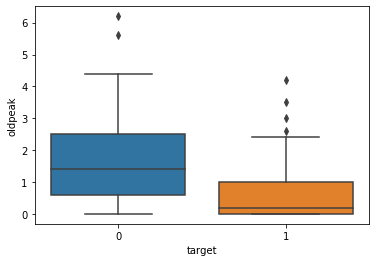

In [91]:
sns.boxplot(x='target',y='oldpeak',data=df)

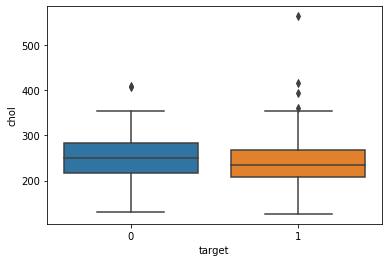

In [92]:
sns.boxplot(x='target',y='chol',data=df)

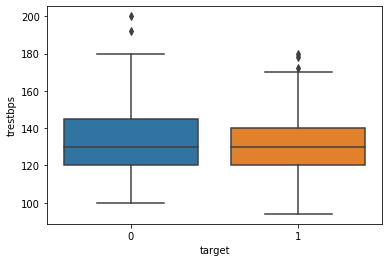

In [93]:
sns.boxplot(x='target',y='trestbps',data=df)

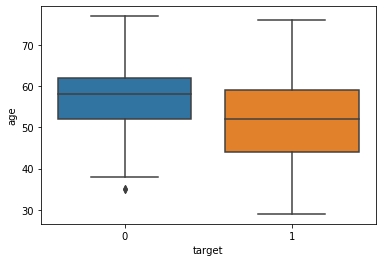

In [94]:
sns.boxplot(x='target',y='age',data=df)

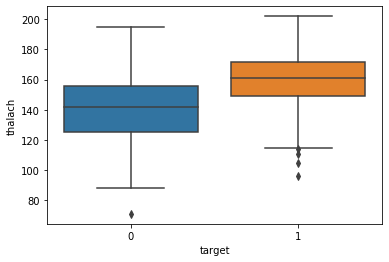

In [95]:
sns.boxplot(x='target',y='thalach',data=df)

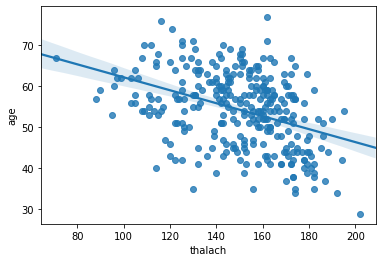

In [96]:
sns.regplot(x='thalach',y='age',data=df)
## so correlation between thalach and age so one has to be included in our expression
## here excluding thlach

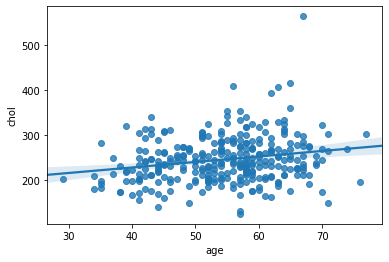

In [97]:
sns.regplot(x='age',y='chol',data=df)

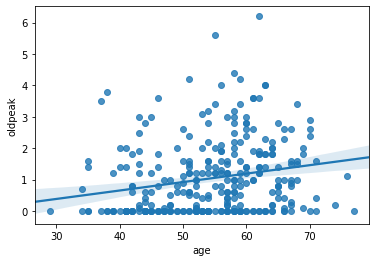

In [98]:
sns.regplot(x='age',y='oldpeak',data=df)

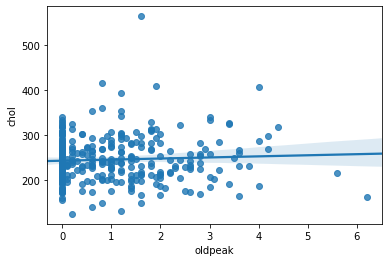

In [100]:
sns.regplot(x='oldpeak',y='chol',data=df)

In [101]:
## age chol oldpeak sholud present(continouus variables)

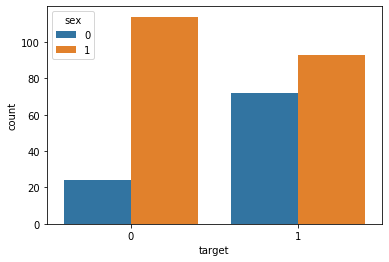

In [102]:
sns.countplot(x=df['target'],hue=df['sex'])

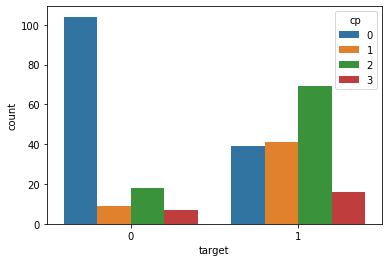

In [103]:
sns.countplot(x=df['target'],hue=df['cp'])

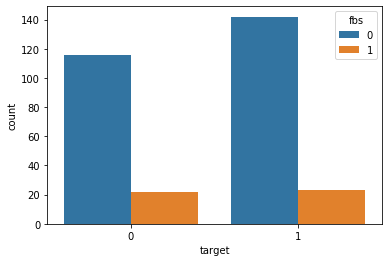

In [104]:
sns.countplot(x=df['target'],hue=df['fbs'])

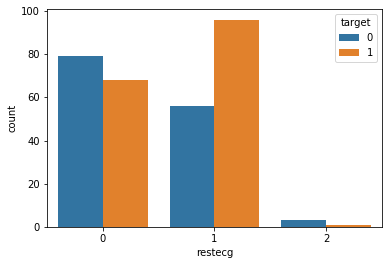

In [105]:
sns.countplot(x=df['restecg'],hue=df['target'])

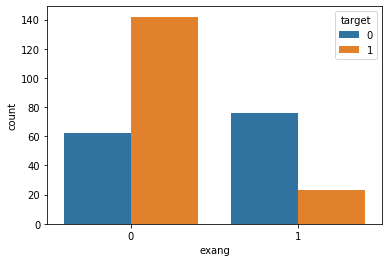

In [106]:
sns.countplot(x=df['exang'],hue=df['target'])

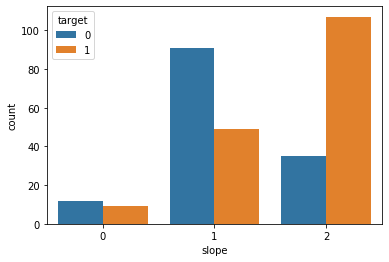

In [107]:
sns.countplot(x=df['slope'],hue=df['target'])

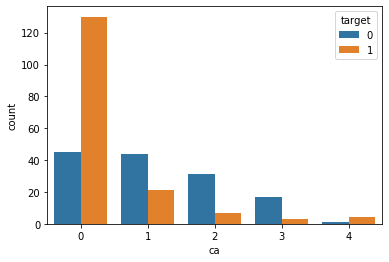

In [108]:
sns.countplot(x=df['ca'],hue=df['target'])

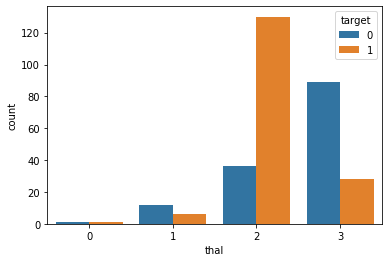

In [109]:
sns.countplot(x=df['thal'],hue=df['target'])

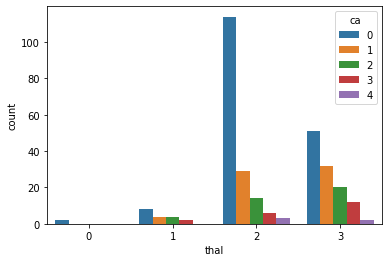

In [110]:
sns.countplot(x=df['thal'],hue=df['ca'])

In [112]:
## how the correlation between two discrete variables are checked ??

In [113]:
df1=df.drop(['trestbps','thalach'],axis=1)

In [114]:
df1.head()

,age,sex,cp,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,233,1,0,0,2.3,0,0,1,1
1,37,1,2,250,0,1,0,3.5,0,0,2,1
2,41,0,1,204,0,0,0,1.4,2,0,2,1
3,56,1,1,236,0,1,0,0.8,2,0,2,1
4,57,0,0,354,0,1,1,0.6,2,0,2,1


In [115]:
#x=df1.iloc[:,0:11].values
x=df1.iloc[:,0:11]

In [116]:
x

,age,sex,cp,chol,fbs,restecg,exang,oldpeak,slope,ca,thal
0,63,1,3,233,1,0,0,2.3,0,0,1
1,37,1,2,250,0,1,0,3.5,0,0,2
2,41,0,1,204,0,0,0,1.4,2,0,2
3,56,1,1,236,0,1,0,0.8,2,0,2
4,57,0,0,354,0,1,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,241,0,1,1,0.2,1,0,3
299,45,1,3,264,0,1,0,1.2,1,0,3
300,68,1,0,193,1,1,0,3.4,1,2,3
301,57,1,0,131,0,1,1,1.2,1,1,3


In [117]:
y=df1.target

In [118]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [119]:
## splitting the train and test data 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [120]:
## is it needed for every to use standard scaler ??

In [121]:
## standardising the scale
from sklearn.preprocessing import StandardScaler 
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.fit_transform(xtest)

In [122]:
xtrain

array([[-1.32773282, -1.43641607,  0.98584243, ..., -0.66169316,
        -0.70710678, -0.46472917],
       [ 1.24903178, -1.43641607,  0.98584243, ..., -0.66169316,
         0.26516504, -0.46472917],
       [ 0.35276583,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       ...,
       [ 0.12869935,  0.69617712,  1.94013791, ..., -0.66169316,
        -0.70710678,  1.14190596],
       [-0.87959984,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       [ 0.35276583,  0.69617712,  0.03154696, ..., -0.66169316,
        -0.70710678, -0.46472917]])

In [73]:
## training the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

C:\Users\Madhan Dasari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
classifier.coef_

array([[-0.26929537, -0.82287713,  0.86814205, -0.18966004, -0.15322954,
         0.09046524, -0.55455358, -0.74288326,  0.20933166, -0.91755764,
        -0.44562772]])

In [123]:
y_predict=classifier.predict(xtest)

In [124]:
## performance of our model by confusion matrix
cm=confusion_matrix(ytest,y_predict)
cm

array([[21,  6],
       [ 3, 31]], dtype=int64)

In [ ]:
## here precision=0.83
## recall=0.91
## fn score = 0.86

In [ ]:
## performance measure -- ACCURACY

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_predict)

0.8524590163934426